# Project 3: Analyzing Subreddits with NLP and Classifiers
**Submitted by: Melody Wu**  
**March 5, 2021**

## Notebook 02

## NLP EDA and Modeling

### Import libraries

In [1]:
# the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# immport metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [21]:
pd.options.display.max_colwidth = 350

### NPL EDA

#### Import Data

In [22]:
# r/FinancialPlanning
finplan_path = '../data/fin_plan_titles.csv'
finplan = pd.read_csv(finplan_path)
# check Dataframe
print(f'There are {finplan.shape[0]} rows and {finplan.shape[1]} columns in this DataFrame.')
finplan.head()

There are 2000 rows and 2 columns in this DataFrame.


,title,subreddit
0,55 and retiring - income,FinancialPlanning
1,Do I need a new CPA to do my taxes?,FinancialPlanning
2,Which subscription service is best for me?,FinancialPlanning
3,Should my girlfriend and I stay in our current apartment or find a cheaper one?,FinancialPlanning
4,Financial Planing Graphs and Charts Ideas,FinancialPlanning


In [5]:
# r/stocks
stocks_path = '../data/stocks_titles.csv'
stocks = pd.read_csv(stocks_path)
# check Dataframe
print(f'There are {stocks.shape[0]} rows and {stocks.shape[1]} columns in this DataFrame.')
stocks.head()

There are 2000 rows and 2 columns in this DataFrame.


,title,subreddit
0,Outlook for renewables with lower treasury yie...,stocks
1,S&amp;P 500 vs. Tech Stocks,stocks
2,Ira inheritance,stocks
3,Is $AMC still a hold?,stocks
4,What percent of individual investors do you gu...,stocks


In [6]:
# concat the two DataFrame into one 
subreddit = pd.concat([finplan, stocks], axis=0, ignore_index=True)
print(f'There are {subreddit.shape[0]} rows and {subreddit.shape[1]} columns in this DataFrame.')

There are 4000 rows and 2 columns in this DataFrame.


In [7]:
# Check sample balance
subreddit['subreddit'].value_counts(normalize=True)

stocks               0.5
FinancialPlanning    0.5
Name: subreddit, dtype: float64

In [8]:
# Check null values
subreddit.isnull().sum()

title        0
subreddit    0
dtype: int64

#### Set up X, y and train/test split

In [30]:
X = subreddit['title']
y = subreddit['subreddit']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# Since we have a balanced dataset, no need to stratify.

#### Pre-processing and EDA with `CountVectorizer`

In [35]:
# instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer(ngram_range=(1,2), stop_words='english')

# fit the CountVectorizer transformer to X_train and transform X_train 
cvec.fit(X_train)
cvec_text = cvec.transform(X_train)

# create a dataframe with the CountVectorized X_train
cvec_text_df = pd.DataFrame(cvec_text.todense(), columns=cvec.get_feature_names())

# add the subreddit_label column to the DataFrame
cvec_text_df['subreddit_label'] = y_train.values

cvec_text_df.head()

,000,000 000,000 120k,000 18,000 accidentally,000 bank,000 cad,000 debt,000 dollars,000 easy,...,لعدم,لعدم كونك,للقتال,محترف,محترف ومستعد,ومستعد,ومستعد للقتال,يكشف,يكشف hicham,subreddit_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FinancialPlanning
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FinancialPlanning
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,stocks
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,stocks
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,stocks


#### Top Occuring words in r/debtfree subreddit

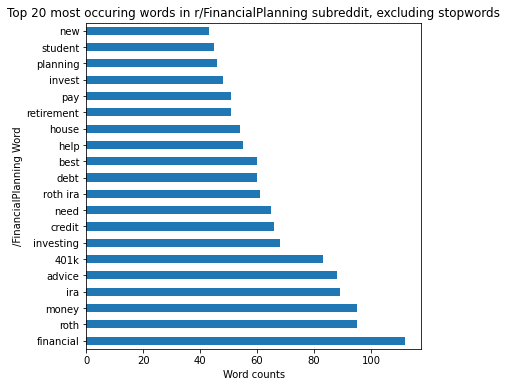

In [36]:
# create a sub DataFrame
cvec_finplan_df = cvec_text_df[cvec_text_df['subreddit_label'] == 'FinancialPlanning'].drop(columns=['subreddit_label'])

# plot top occuring words
plt.figure(figsize=(6,6))
plt.title('Top 20 most occuring words in r/FinancialPlanning subreddit, excluding stopwords')
plt.xlabel('Word counts')
plt.ylabel('/FinancialPlanning Word')
cvec_finplan_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

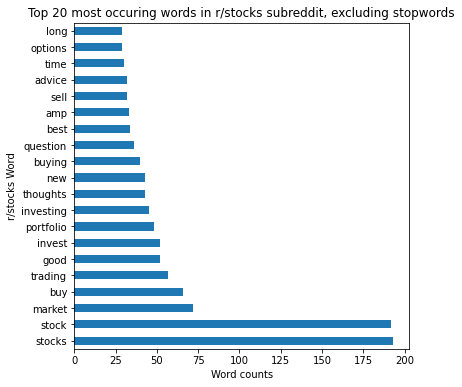

In [37]:
# create a sub DataFrame
cvec_stocks_df = cvec_text_df[cvec_text_df['subreddit_label'] == 'stocks'].drop(columns=['subreddit_label'])

# plot top occuring words
plt.figure(figsize=(6,6))
plt.title('Top 20 most occuring words in r/stocks subreddit, excluding stopwords')
plt.xlabel('Word counts')
plt.ylabel('r/stocks Word')
cvec_stocks_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

***stopwords***   


In [38]:
from sklearn.feature_extraction import text 

# add 'debt' to the stop_words
my_stop_words = text.ENGLISH_STOP_WORDS.union(['financial','stock', 'stocks'])

# reference:https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

In [40]:
cvec = CountVectorizer(ngram_range=(1,2), stop_words=my_stop_words)

# fit the CountVectorizer transformer to X_train and transform X_train 
cvec.fit(X_train)
cvec_text = cvec.transform(X_train)

# create a dataframe with the CountVectorized X_train
cvec_text_df = pd.DataFrame(cvec_text.todense(), columns=cvec.get_feature_names())

# add the subreddit_label column to the DataFrame
cvec_text_df['subreddit_label'] = y_train.values

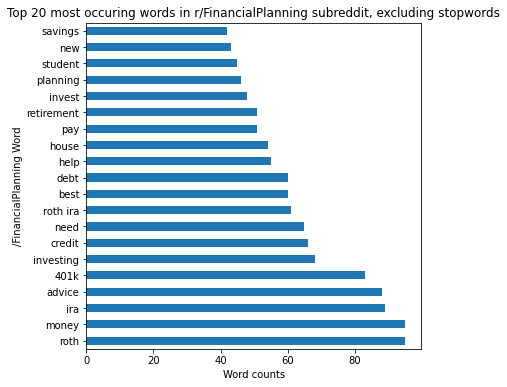

In [41]:
# create a sub DataFrame
cvec_finplan_df = cvec_text_df[cvec_text_df['subreddit_label'] == 'FinancialPlanning'].drop(columns=['subreddit_label'])

# plot top occuring words
plt.figure(figsize=(6,6))
plt.title('Top 20 most occuring words in r/FinancialPlanning subreddit, excluding stopwords')
plt.xlabel('Word counts')
plt.ylabel('/FinancialPlanning Word')
cvec_finplan_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

#### Top Occuring words in r/investing subreddit

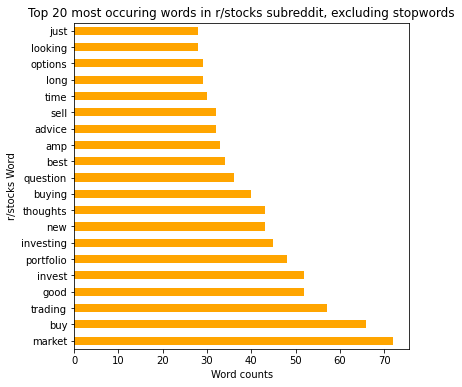

In [44]:
# create a sub DataFrame
cvec_stocks_df = cvec_text_df[cvec_text_df['subreddit_label'] == 'stocks'].drop(columns=['subreddit_label'])

# plot top occuring words
plt.figure(figsize=(6,6))
plt.title('Top 20 most occuring words in r/stocks subreddit, excluding stopwords')
plt.xlabel('Word counts')
plt.ylabel('r/stocks Word')
cvec_stocks_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='orange');

### Using Pipeline to compare models with different Vectorizers and Models.

#### Model 1: CountVectorizer + Logistic Regression

In [63]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegressionCV(solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.981, 0.842)

#### Model 2: TF-IDF Vectorizer + Logistic Regression

In [64]:
pipe = Pipeline([
    ('cv', TfidfVectorizer()),
    ('lr', LogisticRegressionCV(solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.956, 0.854)

#### Model 3: CountVectorizer + Multinomial naive bayes

In [65]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9346666666666666, 0.848)

#### Model 4: TF-IDF Vectorizer + Multinomial naive bayes

In [66]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.938, 0.831)

#### Model 5: CountVectorizer + DecisionTree

In [67]:
from sklearn.tree import export_text, DecisionTreeClassifier, plot_tree

In [68]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('dtc', DecisionTreeClassifier(max_depth=10, random_state=42))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.687, 0.68)

#### Model 6: TF-IDF Vectorizer + DecisionTree

In [69]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('dtc', DecisionTreeClassifier(max_depth=10, random_state=42))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.689, 0.675)

#### Model 7: CountVectorizer + RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier 

In [71]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('rfc', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.999, 0.834)

#### Model 8: TF-IDF Vectorizer + RandomForest

In [72]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('rfc', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.999, 0.809)

#### Model 9: CountVectorizer + AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('abc', AdaBoostClassifier(random_state=42))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.781, 0.762)

#### Model 10: TF-IDF Vectorizer + AdaBoost

In [75]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('abc', AdaBoostClassifier(random_state=42))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.782, 0.773)

#### Model 11: CountVectorizer + SVM  
According to the SVM lecture: doing a kernel SVM with polynomial kernel degree = 2 has been shown to work really well for NLP data!

In [76]:
from sklearn.svm import SVC

In [77]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('svc', SVC())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9523333333333334, 0.839)

#### Model 12: TF-IDF Vectorizer + SVM

In [78]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('svc', SVC())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.987, 0.855)

## My best model is: TF-IDF Vectorizer + SVM (YEAH!!)
This is the best model because it has the highest accuracy score in the testing set.

In [90]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV(solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.956, 0.854)

### Let's GridSearch! 

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
# Example 
# # Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = {
#     'pca__n_components': [5, 15, 30, 45, 64],
#     'logistic__C': np.logspace(-4, 4, 4),
# }
# search = GridSearchCV(pipe, param_grid, n_jobs=-1)
# search.fit(X_digits, y_digits)

In [91]:
# Instantiate the transformers and estimators 
tf = TfidfVectorizer()
lr = LogisticRegressionCV(solver='liblinear')

In [103]:
tf_lr_pipe = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegressionCV(solver='liblinear'))
])

In [93]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['financial','stock', 'stocks'])

In [101]:
pipe_params = {
    'tf__max_features': [2_000, 3_000, 4_000],
    'tf__stop_words': [None, 'english', my_stop_words],
    'tf__ngram_range': [(1,1), (1,2)]    
}

In [104]:
gs_tf_lr = GridSearchCV(tf_lr_pipe,
                        param_grid = pipe_params,
                        cv=5)

In [105]:
gs_tf_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegressionCV(solver='liblinear'))]),
             param_grid={'tf__max_features': [2000, 3000, 4000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': [None, 'english',
                                            frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am'

In [106]:
gs_tf_lr.best_params_

{'tf__max_features': 2000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

In [107]:
gs_tf_lr.best_score_

0.8436666666666668

In [108]:
gs_tf_lr.score(X_train, y_train), gs_tf_lr.score(X_test, y_test)

(0.8863333333333333, 0.844)

### Model Evaluations: Confusion Matrix  

According to GridSearch, the best parameters are: 
```python
{'tf__max_features': 2000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}
```
I am going to use the grid searched model with the above parameters for model evaluations and misclassification analysis.  

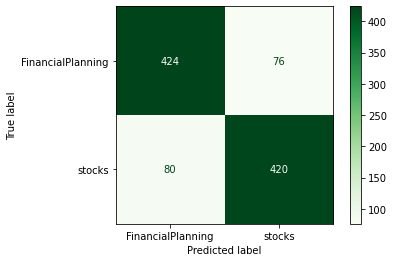

In [109]:
plot_confusion_matrix(gs_tf_lr, X_test, y_test, cmap='Greens');

### Misclassification Analysis

In [110]:
# store predictions
preds = gs_tf_lr.predict(X_test)
predictions_dict = {
    # original, not cv - will be more readable
    'original titles': X_test,
    # true 
    'true_subreddit': y_test,
    # predicted
    'predictions': preds
}
# cast to df
predicitons_df = pd.DataFrame(predictions_dict)

In [112]:
misclass_df = predicitons_df[predicitons_df['true_subreddit'] != predicitons_df['predictions']]

In [113]:
misclass_df.head()

,original titles,true_subreddit,predictions
2164,"My $15,000 investment",stocks,FinancialPlanning
469,Not sure if I’m making good choices overall. Direction needed,FinancialPlanning,stocks
2735,Need some suggestions,stocks,FinancialPlanning
1508,Thoughts on inflation/recession proofing your retirement?,FinancialPlanning,stocks
1598,SWAGX or similar for short term?,FinancialPlanning,stocks


In [114]:
cvec = CountVectorizer(ngram_range=(1,2), stop_words=my_stop_words)

# fit the CountVectorizer transformer to X_train and transform X_train 
cvec.fit(misclass_df['original titles'])
cvec_text = cvec.transform(misclass_df['original titles'])

# create a dataframe with the CountVectorized X_train
cvec_text_df = pd.DataFrame(cvec_text.todense(), columns=cvec.get_feature_names())

In [115]:
cvec_text_df

,000,000 investment,000 start,10,10 million,101,15,15 000,15 year,15 years,...,years,years popular,youtube,youtube channels,youtube com,youtube mp3,yr,yr old,zero,zero commission
0,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


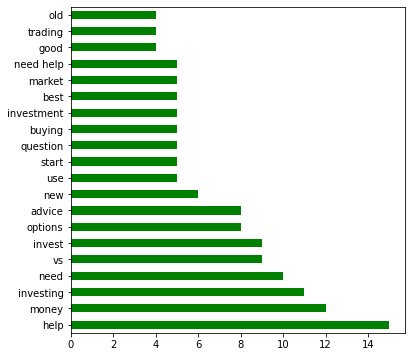

In [118]:
# plot top occuring words
plt.figure(figsize=(6,6))
cvec_text_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='green');